## Import necessary libraries

In [273]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Load data

In [274]:
df = pd.read_excel('/Users/vharibab/Desktop/PSP_Jan_Feb_2019.xlsx')
df = pd.DataFrame(df)

# I. Data Quality Assessment

In [275]:
# Check for missing values|
print('this is our dataset   : \n', df)
print("Missing values for each column:")
print(df.isnull().sum())

this is our dataset   : 
 0         89
1         89
2        238
3        238
4        124
        ... 
50405    415
50406     91
50407     91
50408     91
50409     91
Name: amount, Length: 50410, dtype: int64
Missing values for each column:
Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


In [276]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print("\nNumber of outliers in 'amount':", len(outliers))


Number of outliers in 'amount': 153


# II. Exploratory Data Analysis
## Import necessary libraries



In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Histograms of transaction amounts

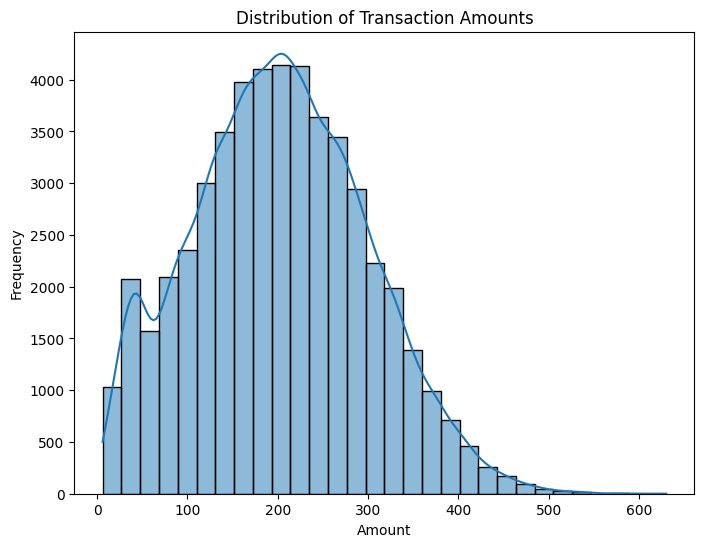

In [279]:
plt.figure(figsize=(8,6))
sns.histplot(df['amount'], kde=True, bins=30)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

## Success rates by country

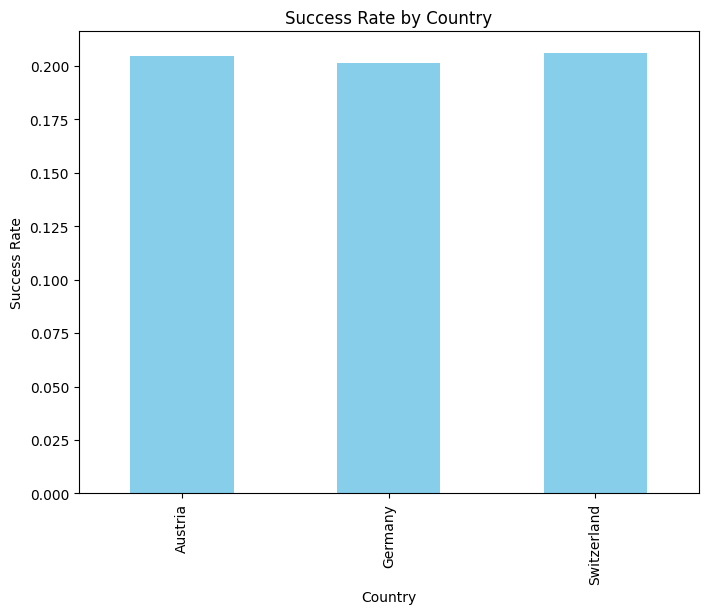

In [280]:
success_rate = df.groupby('country')['success'].mean()
plt.figure(figsize=(8,6))
success_rate.plot(kind='bar', color='skyblue')
plt.title("Success Rate by Country")
plt.xlabel("Country")
plt.ylabel("Success Rate")
plt.show()

## PSP usage distribution

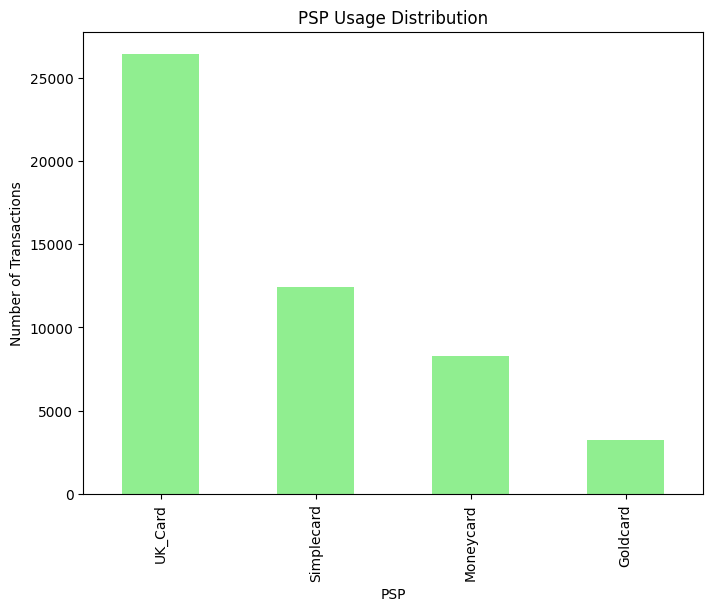

In [281]:
psp_count = df['PSP'].value_counts()
plt.figure(figsize=(8,6))
psp_count.plot(kind='bar', color='lightgreen')
plt.title("PSP Usage Distribution")
plt.xlabel("PSP")
plt.ylabel("Number of Transactions")
plt.show()

## Correlation matrix to identify potential relationships

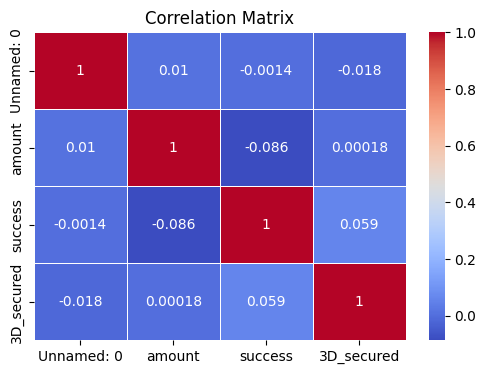

In [282]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Relationship between variables:'amount' and 'success'

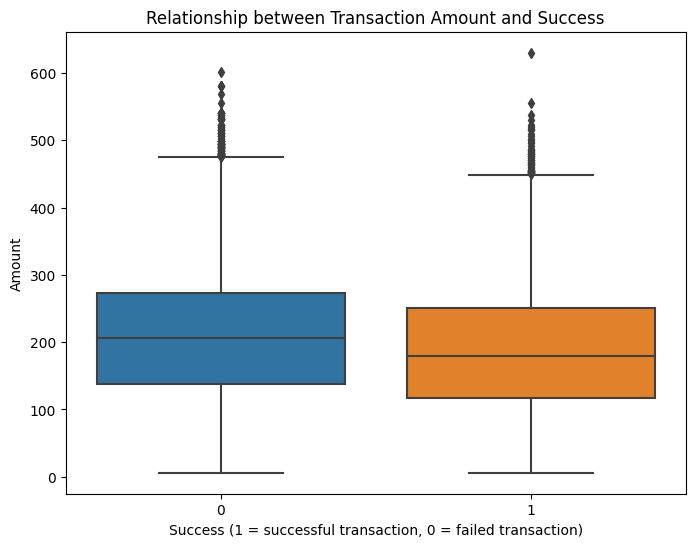

In [283]:
plt.figure(figsize=(8,6))
sns.boxplot(x='success', y='amount', data=df)
plt.title("Relationship between Transaction Amount and Success")
plt.xlabel("Success (1 = successful transaction, 0 = failed transaction)")
plt.ylabel("Amount")
plt.show()


## 3D Secure Transactions

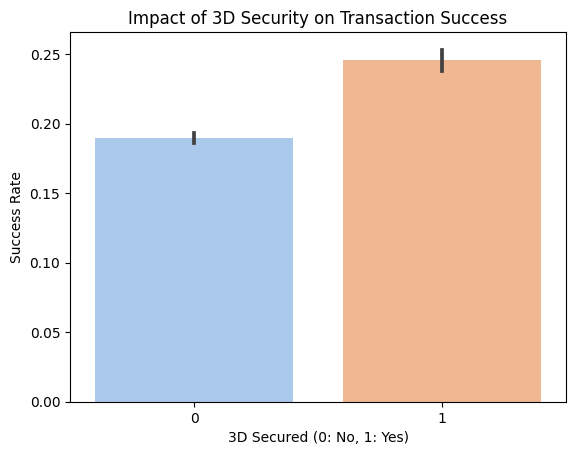

In [284]:
sns.barplot(x=df['3D_secured'], y=df['success'], palette='pastel')
plt.title('Impact of 3D Security on Transaction Success')
plt.ylabel('Success Rate')
plt.xlabel('3D Secured (0: No, 1: Yes)')
plt.show()


## Success Rate Based on Card Type Bar Graph

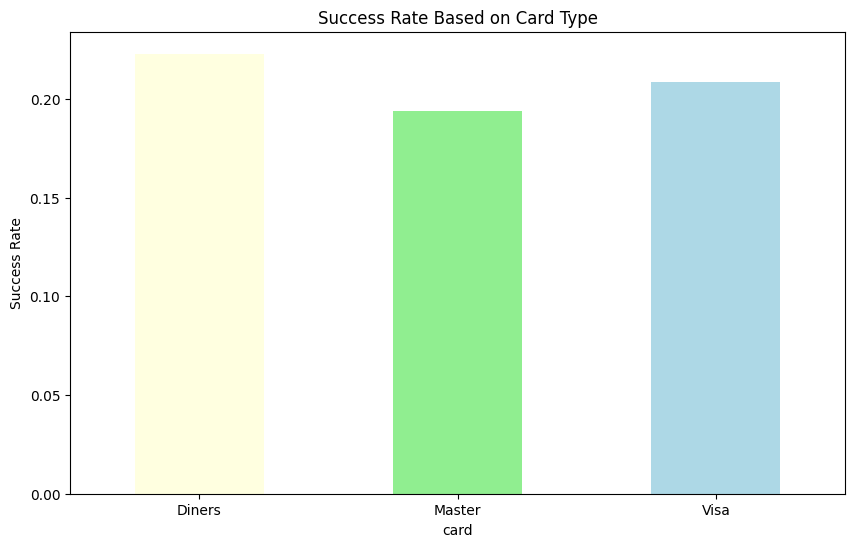

In [285]:
card_success_rates = df.groupby('card')['success'].mean()

plt.figure(figsize=(10,6))
card_success_rates.plot(kind='bar', color=['Lightyellow', 'lightgreen', 'lightblue'])
plt.title('Success Rate Based on Card Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=0)
plt.show()

# III. Data Preparation


In [286]:
# Impute missing values (for demonstration, mean for 'amount' and mode for 'country' and 'card')
df['amount'].fillna(df['amount'].mean(), inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['card'].fillna(df['card'].mode()[0], inplace=True)

In [287]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = df.drop(columns=['Unnamed: 0'])

# Extracting features from 'tmsp' column
df['tmsp'] = pd.to_datetime(df['tmsp'])
df['hour'] = df['tmsp'].dt.hour
df['day'] = df['tmsp'].dt.day
df['weekday'] = df['tmsp'].dt.weekday

# Drop original 'tmsp' column
df = df.drop(columns=['tmsp'])

# One-hot encoding categorical columns
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['country', 'PSP', 'card']])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['country', 'PSP', 'card']))

# Merging one-hot encoded columns with original df
df = df.join(encoded_df)

# Drop original categorical columns
df = df.drop(columns=['country', 'PSP', 'card'])

# Scaling the 'amount' column
scaler = StandardScaler()
df['amount'] = scaler.fit_transform(df[['amount']])

# Train/test split
X = df.drop(columns=['success'])
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print (df)

         amount  success  3D_secured  hour  day  weekday  country_Austria   
0     -1.177846        0           0     0    1        1              0.0  \
1     -1.177846        1           0     0    1        1              0.0   
2      0.369823        0           1     0    1        1              0.0   
3      0.369823        1           1     0    1        1              0.0   
4     -0.814300        0           0     0    1        1              1.0   
...         ...      ...         ...   ...  ...      ...              ...   
50405  2.208330        0           0    23   28        3              0.0   
50406 -1.157072        0           0    23   28        3              1.0   
50407 -1.157072        0           0    23   28        3              1.0   
50408 -1.157072        0           0    23   28        3              1.0   
50409 -1.157072        1           0    23   28        3              1.0   

       country_Germany  country_Switzerland  PSP_Goldcard  PSP_Moneycard   

# IV- Baseline model development

## Preprocessing

## Model Training & Coefficient Interpretation

## Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate success rate
success_rate = accuracy_score(y_test, y_pred)
print(f"Success Rate: {success_rate * 100:.2f}%")


total_fees = df.apply(calculate_fees, axis=1).sum()
print(f"Total Fees: ${total_fees:.2f}")



Success Rate: 80.65%
Total Fees: $88544.00


# Random Forest Model

In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate success rate
success_rate = accuracy_score(y_test, y_pred_rf)
print(f"Success Rate: {success_rate * 100:.3f}%")

Success Rate: 76.843%


## Improving Random Forest Model

In [299]:

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5, scoring='accuracy')

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters found: ", best_params)


# Evaluate the model with best parameters
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf) * 100 

print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}%")


Best parameters found:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Optimized Random Forest Accuracy: 87.77%
